In [52]:
import cv2
import matplotlib.pyplot as plt # on utilise matplotlib pour afficher les images sinon on fait crash le kernel avec cv2.imshow
import numpy as np

In [53]:
def show_image(image,titre="image"):
    """ Fonction qui affiche une image avec matplotlib car openCV ne fonctionne pas avec jupyter notebook pour l'affichage
    
    Args
    ----
    image: numpy.ndarray
        Image à afficher
    titre: str
        titre de l'image
    """
    # on convertit l'image en RGB pour l'afficher avec matplotlib car OpenCV utilise BGR
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(titre)
    plt.show()

def group_show(liste_image,titres):
    """ Pour afficher directement les images par team

    Args
    ----
    liste_image: list
        liste des images à afficher
    titres: list
        titre des images
    """
    if titres == None: # on gère le cas où les titres ne sont pas renseignés
        titres = [None]*len(liste_image)

    fig, ax = plt.subplots(1, len(liste_image), figsize=(20, 20))
    liste_image_modif = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB)for image in liste_image]
    for i in range(len(liste_image_modif)):
        ax[i].imshow(liste_image_modif[i])
        ax[i].set_title(titres[i])

hauteur:  901 largeur:  1599
y:  9 x:  15


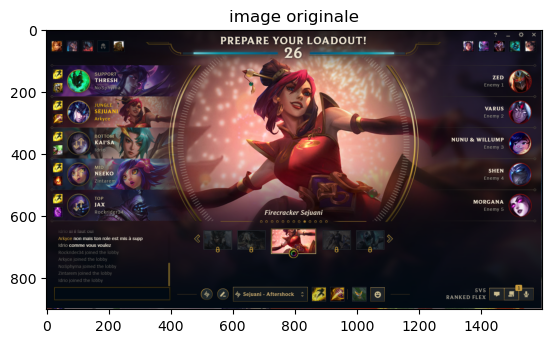

In [54]:
img = cv2.imread("champ_select4.png")
hauteur, largeur = img.shape[:2]
print("hauteur: ", hauteur, "largeur: ", largeur)
y = int(hauteur/100) # on va utiliser des pourcentages pour recadrer l'image afin de pouvoir l'utiliser sur d'autres images qui ne seraient pas de la même taille
x = int(largeur/100)
print("y: ", y, "x: ", x)

show_image(img, "image originale")

In [55]:
sep_h_img = int((9/570)*hauteur)
ratio_deb_h = int((81/570)*hauteur)
ratio_icon_h = int((55/570)*hauteur)

liste_champ_1=[[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]

for i in range(len(liste_champ_1)):
    liste_champ_1[i][0] = img[ratio_deb_h+i*(ratio_icon_h+sep_h_img):ratio_deb_h+i*(ratio_icon_h+sep_h_img)+ratio_icon_h, int((40/1019)*largeur):int((40/1019)*largeur)+int((55/1019)*largeur)]
    liste_champ_1[i][1] = img[ratio_deb_h+i*(ratio_icon_h+sep_h_img):ratio_deb_h+i*(ratio_icon_h+sep_h_img)+ratio_icon_h, int((10/1019)*largeur):int((10/1019)*largeur)+int((55/1019)*largeur)]

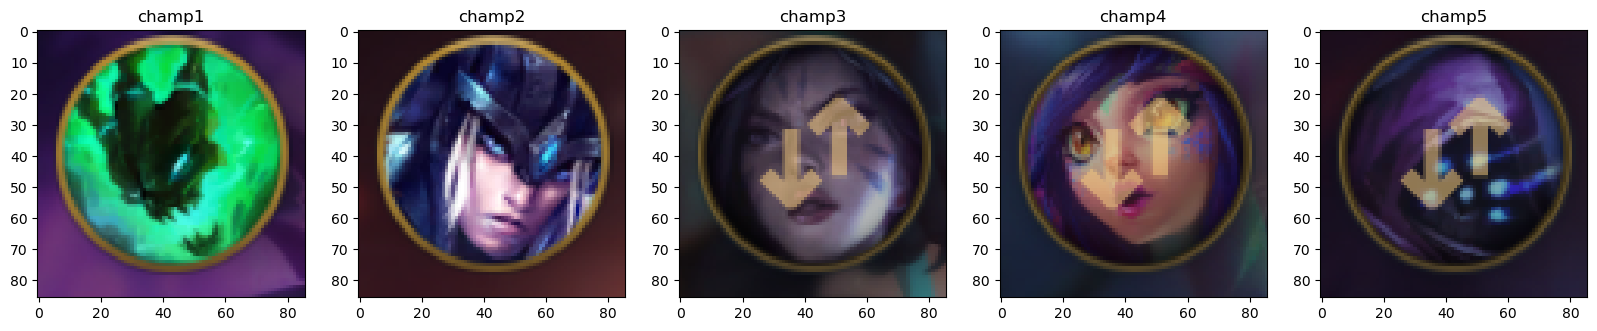

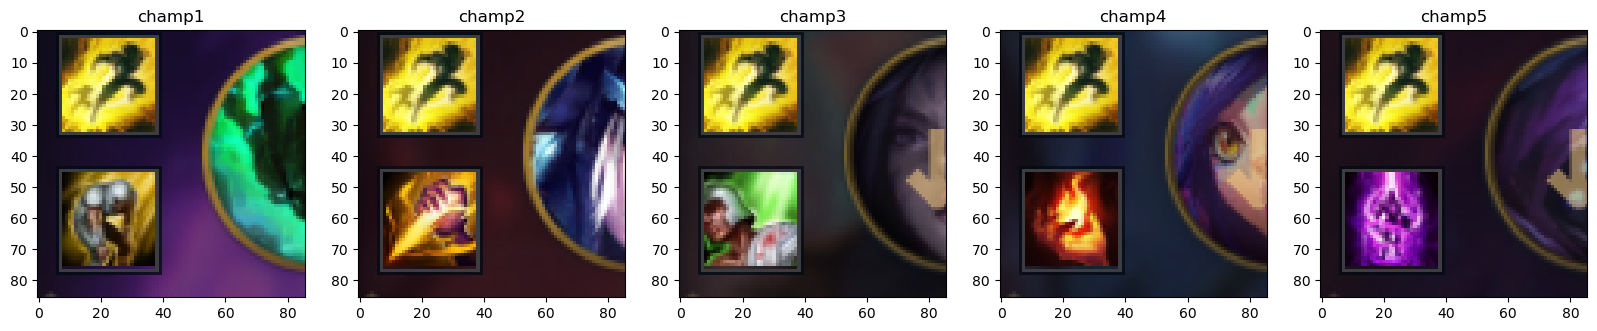

In [56]:
liste_champ_col_1 = list(list(zip(*liste_champ_1))[0])
liste_champ_col_2 = list(list(zip(*liste_champ_1))[1])
titres_1 = ["champ1", "champ2", "champ3", "champ4", "champ5"]

group_show(liste_champ_col_1, titres_1)
group_show(liste_champ_col_2, titres_1)

Taille icone ratio : 
hor : 50/1019
vert : 50/570

On peut prendre 55 pour avoir un peu de marge

écart entre 2 : 9

haut 1 : 81
gauche pas décalée : 40

gauche décalée : 10

droite : 956


In [57]:
sep_h_img = int((9/570)*hauteur)
ratio_deb_h = int((81/570)*hauteur)
ratio_icon_h = int((55/570)*hauteur)

liste_champ_2 = [[],[],[],[],[]]

for i in range(len(liste_champ_2)):
    liste_champ_2[i].append(img[ratio_deb_h+i*(ratio_icon_h+sep_h_img):ratio_deb_h+i*(ratio_icon_h+sep_h_img)+ratio_icon_h, int((945/1019)*largeur):int((945/1019)*largeur)+int((55/1019)*largeur)])

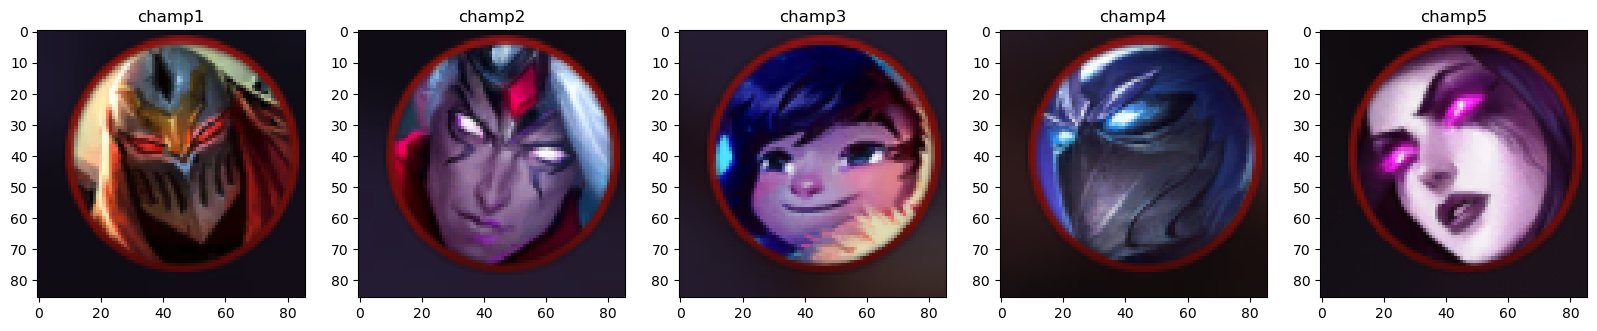

In [58]:
liste_champ_2_modif = list(list(zip(*liste_champ_2))[0])
titres_2 = ["champ1", "champ2", "champ3", "champ4", "champ5"]
group_show(liste_champ_2_modif, titres_2)

In [59]:
def detection_champ(image,titre):
    """ Fonction qui détecte les champions de la champ select avec des cercles

    Args
    ----
    image: list of numpy.ndarray
        liste d'images dans laquelle on veut détecter les cercles pour un champion : car il y a un décalage entre les deux images
    titre: str
        titre de l'image

    Returns
    -------
    image: numpy.ndarray
        image avec les cercles détectés
    """

    cv2.imwrite(f"{titre}.jpg", image[0])
    img = cv2.imread(f"{titre}.jpg",0)
    
    if len(image)>1:
        cv2.imwrite(f"{titre}.jpg", image[1])
        image_pos_2 = cv2.imread(f"{titre}.jpg",0)

    # increase the contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)

    # detect and show circles in the "img" image
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,80,
                                param1=50,param2=30,minRadius=12,maxRadius=50)
    if len(image)>1:
        if circles is not None :
            # on essaie avec la première image
            circles = np.uint16(np.around(circles))
            for i in circles[0,:]:
                mask = np.zeros_like(image[0])
                mask = cv2.circle(mask, (i[0],i[1]), i[2], (255,255,255), -1)
                image[0] = cv2.bitwise_and(image[0], mask)
                # # draw the outer circle
                # cv2.circle(image[0],(i[0],i[1]),i[2],(0,255,0),1)
                return(image[0])
        else :
            # on passe sur la deuxième image si elle existe
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            image_pos_2 = clahe.apply(image_pos_2)
            circles = cv2.HoughCircles(image_pos_2,cv2.HOUGH_GRADIENT,1,80,param1=50,param2=30,minRadius=12,maxRadius=50)
            
            if circles is not None:
                circles = np.uint16(np.around(circles))
                for i in circles[0,:]:
                    mask = np.zeros_like(image[1])
                    mask = cv2.circle(mask, (i[0],i[1]), i[2], (255,255,255), -1)
                    image[1] = cv2.bitwise_and(image[1], mask)

                #     # draw the outer circle
                #     cv2.circle(image[1],(i[0],i[1]),i[2],(0,255,0),1)
            return(image[1])

    elif circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            mask = np.zeros_like(image[0])
            mask = cv2.circle(mask, (i[0],i[1]), i[2], (255,255,255), -1)
            image[0] = cv2.bitwise_and(image[0], mask)

        #     # draw the outer circle
        #     cv2.circle(image[0],(i[0],i[1]),i[2],(0,255,0),1)
    return(image[0])

In [60]:
images_detect_1 = []
for i,image in enumerate(liste_champ_1):
    images_detect_1.append(detection_champ(image, titres_1[i]))

images_detect_2 = []
for i,image in enumerate(liste_champ_2):
    images_detect_2.append(detection_champ(image, titres_2[i]))

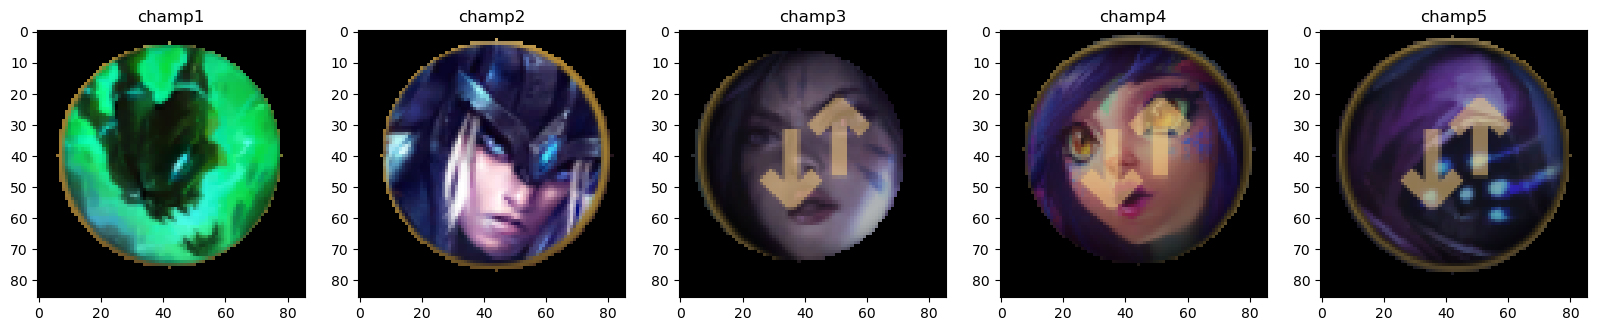

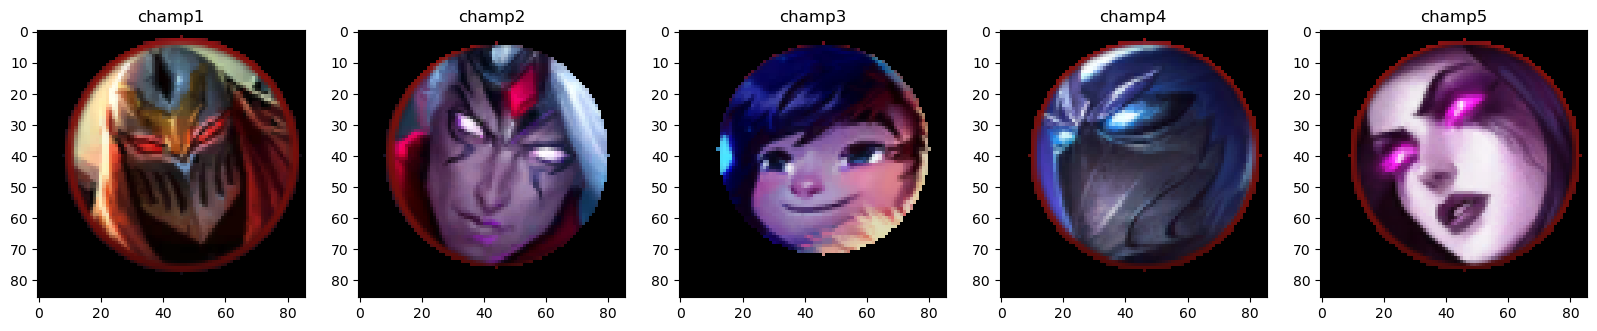

In [61]:
group_show(images_detect_1, titres_1)
group_show(images_detect_2, titres_2)

### Récup des bans

Ratio largeur bans : 22/1019
Ratio hauteur bans : 22/570

Prendre 25 pour être large

Ratio séparation : 8/1019

Début gauche (bans 1) ratio : 9/1019
Début haut ratio : 20/570

In [62]:
sep_l_img = int((8/1019)*largeur)
ratio_deb_h = int((22/570)*hauteur)

ratio_icon_l = int((25/1019)*largeur)
ratio_icon_h = int((25/570)*hauteur)

ratio_deb_l_1 = int((9/1019)*largeur)
ratio_deb_l_2 = int((856/1019)*largeur)

liste_bans_1 = [[],[],[],[],[]]
liste_bans_2 = [[],[],[],[],[]]

for i in range(len(liste_champ_2)):
    liste_bans_1[i].append(img[ratio_deb_h:ratio_deb_h+ratio_icon_h,ratio_deb_l_1+i*(ratio_icon_l+sep_l_img):ratio_deb_l_1+i*(ratio_icon_l+sep_l_img)+ratio_icon_l])
    liste_bans_2[i].append(img[ratio_deb_h:ratio_deb_h+ratio_icon_h,ratio_deb_l_2+i*(ratio_icon_l+sep_l_img):ratio_deb_l_2+i*(ratio_icon_l+sep_l_img)+ratio_icon_l])

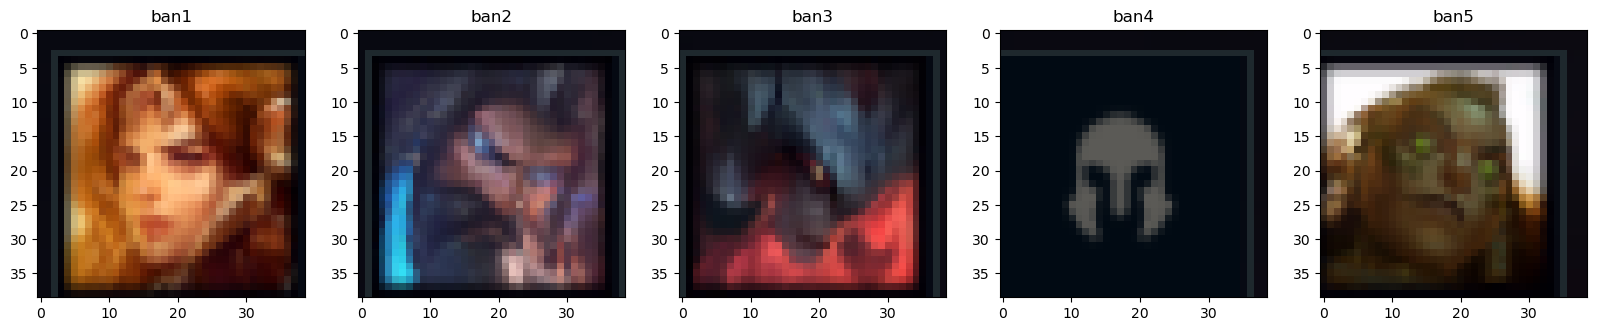

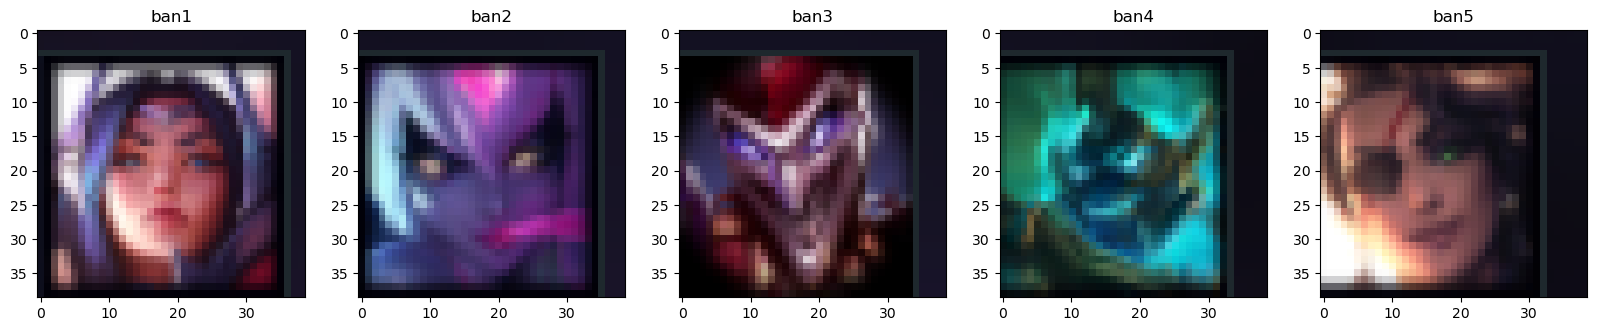

In [63]:
liste_bans_1_modif = list(list(zip(*liste_bans_1))[0])
titres_bans_1 = ["ban1","ban2", "ban3", "ban4", "ban5"]
group_show(liste_bans_1_modif, titres_bans_1)

liste_bans_2_modif = list(list(zip(*liste_bans_2))[0])
titres_bans_2 = ["ban1","ban2", "ban3", "ban4", "ban5"]
group_show(liste_bans_2_modif, titres_bans_2)

In [64]:
from tensorflow import keras

def predictions(liste_image,nom_model):
    """ Fonction qui prédit les champions à partir des images

    Args
    ----
    liste_image: list of numpy.ndarray
        liste d'images des champions
    nom_model: str
        nom du modèle à utiliser

    Returns
    -------
    predictions: list of str
        liste des champions prédits
    """

    predictions_finales = []
    images_RGB = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB)for image in liste_image]

    # get the max image shape
    max_shape = tuple(max(image.shape[x] for image in images_RGB) for x in range(3))

    # construct an image batch object
    image_to_pred = np.zeros((5,) + max_shape, dtype='float32')

    # copy all images to the upper left part of the image batch object
    for image_index, image in enumerate(images_RGB):
        image_to_pred[image_index, :image.shape[0], :image.shape[1], :image.shape[2]] = image

    model = keras.models.load_model(f"{nom_model}")

    # get the predictions for the test data
    predictions = model.predict(image_to_pred)

    # get the predicted class as the index of the highest probability
    predicted_classes = np.argmax(predictions, axis=1)

    # get the three index of highest probability
    top_5 = np.argsort(predictions, axis=1)[:,-5:]

    champions = ['Aatrox', 'Ahri', 'Akali', 'Akshan', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Aphelios', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Belveth', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'Draven', 'DrMundo', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'FiddleSticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Gwen', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'KSante', 'Leblanc', 'LeeSin', 'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Neeko', 'Nidalee', 'Nilah', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Pyke', 'Qiyana', 'Quinn', 'Rakan', 'Rammus', 'RekSai', 'Rell', 'Renata', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze', 'Samira', 'Sejuani', 'Senna', 'Seraphine', 'Sett', 'Shaco', 'Shen', 'Shyvana', 'Singed', 'Sion', 'Sivir', 'Skarner', 'Sona', 'Soraka', 'Swain', 'Sylas', 'Syndra', 'TahmKench', 'Taliyah', 'Talon', 'Taric', 'Teemo', 'Thresh', 'Tristana', 'Trundle', 'Tryndamere', 'TwistedFate', 'Twitch', 'Udyr', 'Urgot', 'Varus', 'Vayne', 'Veigar', 'Velkoz', 'Vex', 'Vi', 'Viego', 'Viktor', 'Vladimir', 'Volibear', 'Warwick', 'Xayah', 'Xerath', 'XinZhao', 'Yasuo', 'Yone', 'Yorick', 'Yuumi', 'Zac', 'Zed', 'Zeri', 'Ziggs', 'Zilean', 'Zoe', 'Zyra']


    print(" 5 + grandes probas pour chaque prédiction :")
    for i in range(len(top_5)):
        # inverse la liste pour avoir les plus grandes probas en premier
        liste_top_5 = top_5[i][::-1]
        print([champions[j] for j in liste_top_5])



    for i in range(len(predicted_classes)):
        predictions_finales.append(champions[predicted_classes[i]])

    return(predictions_finales)

1/1 [==============================] - 0s 234ms/step
 5 + grandes probas pour chaque prédiction :
['Sion', 'Darius', 'Teemo', 'Kindred', 'Zed']
['Darius', 'Hecarim', 'Ornn', 'Varus', 'Vayne']
['Ryze', 'Nunu', 'Taric', 'Ashe', 'Vayne']
['Heimerdinger', 'Shyvana', 'Ahri', 'Ornn', 'Taric']
['Velkoz', 'Kayn', 'Vayne', 'Darius', 'Morgana']


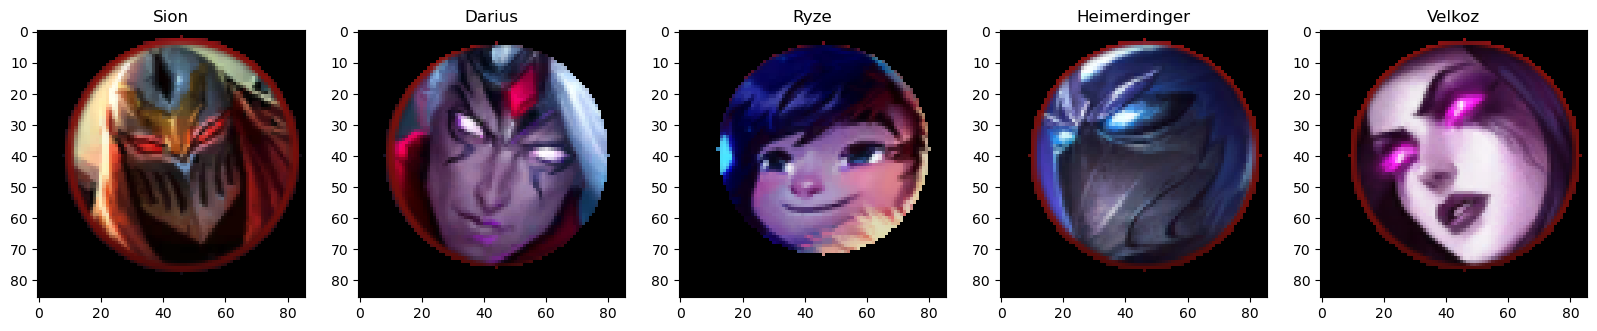

In [69]:
res = predictions(images_detect_2,"modeles/model_24_02")
group_show(images_detect_2,res)

# Création d'images ressemblant aux picks

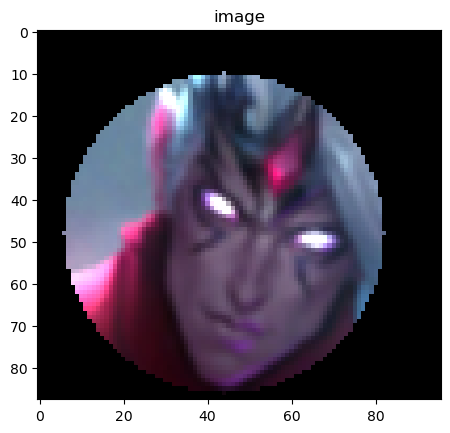

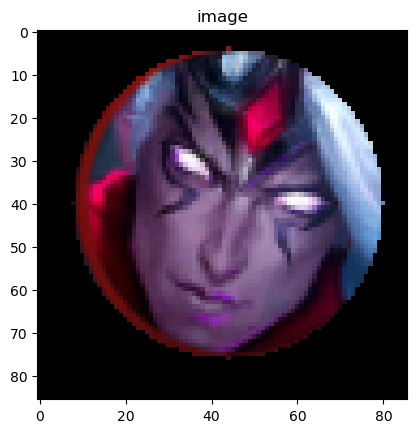

In [107]:
image = cv2.imread("images_draft/Varus/Varus_0.jpg")

# reduce the quality of the image
# Pour ressembler aux picks : 

# delete 50 pixels on the left and right and on the top and bottom
image_pick = image[20:-140, 50:-90]

image_pick = cv2.resize(image_pick, (0, 0), fx=0.40, fy=0.40)

# blur the image
image_pick = cv2.GaussianBlur(image_pick, (3,3), 0)

# make the image less bright
image_pick = cv2.addWeighted(image_pick, 1.5, np.zeros(image_pick.shape, image_pick.dtype), 0, 0)

# add a circle around the champion and put black pixel all around
mask = np.zeros_like(image_pick)
mask = cv2.circle(mask, (int(image_pick.shape[0]/2), int(image_pick.shape[1]/2)), int(image_pick.shape[0]/2.3), (255,255,255), -1)

# apply mask to image
image_pick = cv2.bitwise_and(image_pick, mask)
show_image(image_pick)


show_image(images_detect_2[1])



# Création d'images ressemblant aux bans

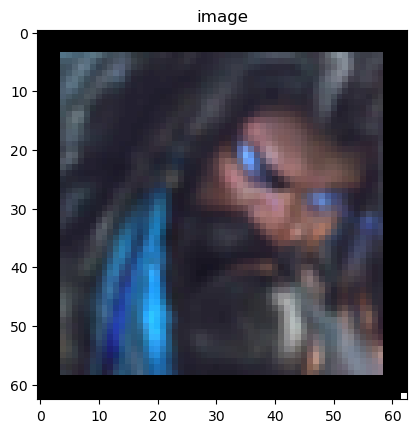

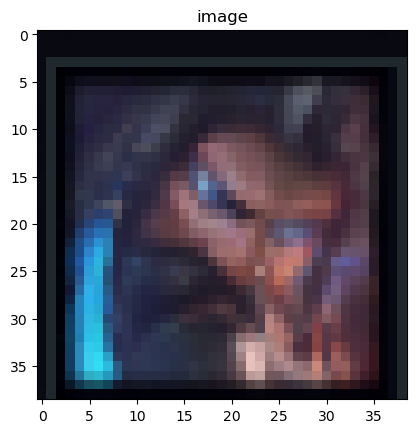

In [106]:
image = cv2.imread("images_draft/Udyr/Udyr_0.jpg")

# Pour ressembler aux picks : 

# delete 50 pixels on the left and right and on the top and bottom
image_ban = image[80:-120, 100:-100]
image_ban = cv2.resize(image_ban, (0, 0), fx=0.35, fy=0.35)
# blur the image
image_ban = cv2.GaussianBlur(image_ban, (3, 3), 0)


# make the image less bright
image_ban = cv2.addWeighted(image_ban, 2.5, np.zeros(image_ban.shape, image_ban.dtype), 0, 0)


# add a rectangle around the champion and put black pixel all around
mask = np.zeros(image_ban.shape,np.uint8)
mask[4:image_ban.shape[0]-4,4:image_ban.shape[1]-4] = image_ban[4:image_ban.shape[0]-4,4:image_ban.shape[1]-4]
mask[image_ban.shape[0]-1,image_ban.shape[1]-1] = (255,255,255)

show_image(mask)

show_image(liste_bans_1_modif[1])

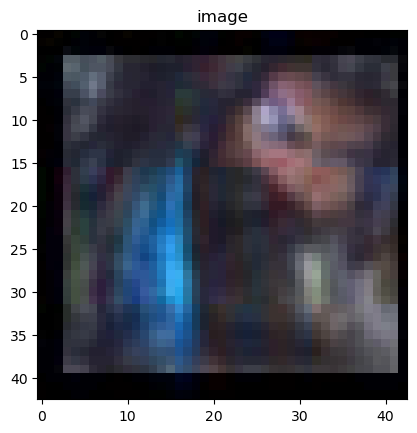

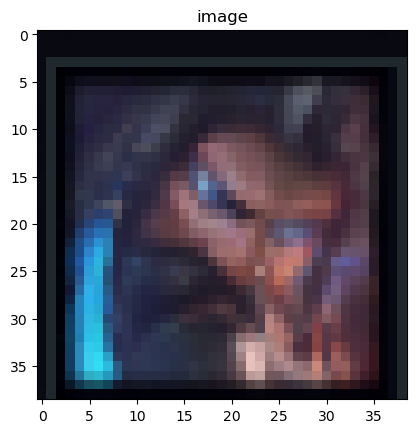

In [24]:
image = cv2.imread("dataset/train/Udyr_112.jpg")

# make the image brighter
image = cv2.addWeighted(image, 2.5, np.zeros(image.shape, image.dtype), 0, 0)

show_image(image)

show_image(liste_bans_1_modif[1])

In [109]:
param_possibles = [(x,y,z,a,b,c) for x in [50] for y in [-80,-90,-100] for z in [60] for a in [-100,-85] for b in [0.15,0.20,0.25,0.30] for c in [3,5,7]]


param_possibles_bans = [(x,-200+x,x+40,-160+x,resize,blur,bright) for x in range(0,100,20) for resize in [0.16,0.18,0.20,0.22,0.24] for blur in [3] for bright in [0.8,0.85,0.9,0.95,1,1.5,2,2.5]]

param_possibles_picks = [(x1,-160+x1,y1,-160+y1,resize,blur,bright) for x1 in range(20,120,20) for y1 in range(20,100,20) for resize in [0.20,0.25,0.30,0.35,0.40,0.45] for blur in [3,5] for bright in [0.7,0.85,1,1.2,1.4]]

print(len(param_possibles))
print(len(param_possibles_bans))
print(len(param_possibles_picks))
# print(param_possibles_bans)

#----------------- avant la maj du 03/03/2023 ----------------- 
# la version qui avait donné 7/8 sur une des lignes de bans (avec pb Udyr)
# param_possibles = [(x,y,z,a,b,c,bright) for x in [50] for y in [-80,-90,-100] for z in [60] for a in [-100,-85] for b in [0.15,0.20,0.25,0.30] for c in [3,5,7] for bright in [0.7,0.8,0.9,1]]
# param_possibles_bans = [(x,-200+x,y,-200+y,resize,blur,bright) for x in range(30,150,20) for y in range(20,120,20) for resize in [0.16,0.18,0.20,0.22,0.24] for blur in [3] for bright in [0.8,0.85,0.9,0.95,1]]
# param_possibles_picks = [(x1,-160+x1,y1,-160+y1,resize,blur,bright) for x1 in range(25,125,25) for y1 in range(25,100,25) for resize in [0.20,0.24,0.27] for blur in [3,5] for bright in [0.7,0.8,0.9,1]]


72
200
1200
